# Meringkas Berita Kompas


#1. Library Yang Dibutuhakan

In [ ]:
import pandas as pd
#Ekstraksi fitur
import nltk
from nltk.tokenize import sent_tokenize
#Preprocessing
import re
from nltk.corpus import stopwords
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer, TfidfTransformer
#Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
#Graph
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#2. Import Data Berita Kompas

Data yang digunakan merupakan data berita kompas yang sudah dicrawling.

In [202]:
from google.colab import drive
drive.mount('/content/drive')

csv_path = '/content/drive/My Drive/Penweb/data_berita.csv'
df = pd.read_csv(csv_path)
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Judul,Berita
0,"Dapat Nomor Urut 3, Ganjar: Persatuan Indonesia","Menurut dia, semangat persatuan Indonesia itu..."
1,"Prabowo: Kalau Pemilu Curang, Mengkhianati Ban...","JAKARTA, KOMPAS.com - Calon presiden (capres) ..."
2,Nestle Indonesia PHK 126 Karyawan di Pabrik Ja...,"JAKARTA, KOMPAS.com - PT Nestle Indonesia mela..."
3,Lirik dan Chord Lagu I Tried to Leave You - Le...,Lagu bergenre pop tersebut dirilis pada 1988 m...
4,"Lirik Lagu Another Life, Lagu Baru dari PinkPa...",Di lagu ini ia berkolaborasi dengan penyanyi a...
5,Penderita Diabetes Tetap Sehat dengan Menerapk...,"Sebagai informasi, penyakit diabetes terbagi d..."
6,Jalan Tol Akses Stasiun Kereta Cepat Whoosh Ka...,"JAKARTA, KOMPAS.com - Kementerian Pekerjaan Um..."
7,Penyedap Rasa Sintetis: Pengertian dan Contohnya,KOMPAS.com – Penyedap rasa adalah salah satu b...
8,"Gibran: Kalau Ada Kecurangan Pemilu 2024, Sila...","Menurut dia, jika terjadi kecurangan di Pemil..."
9,"Tak Ajak Relawan ke KPU Saat Ambil Nomor Urut,...","JAKARTA, KOMPAS.com - Calon presiden (capres) ..."


#3. Mengakses Berita

Berita yang akan diproses hanya satu berita saja. Berita yang diambil merupakan berita pada baris indeks 0.

In [ ]:
Berita = df["Berita"].iloc[0]

#4. Preprocessing Data

Proses preprocessing bertujuan untuk membersihkan dan mempersiapkan data agar sesuai untuk analisis selanjutnya. Dalam preprocessing untuk data berita kompas menggunakan beberapa proses yaitu mengahapus angka dari data, menghilangkan karakter non-alphanumerik kecuali spasi dan titik, dan menghapus kata-kata umum (stopwords). Proses menghapus angka dan menghilangkan karakter menggunakan library re (Regular Expressions). Library Re digunakan untuk melakukan operasi penggantian teks menggunakan ekspresi reguler. Proses stopwords menggunakan library nltk. Library nltk menyediakan berbagai kamus stopwords untuk beberapa bahasa, termasuk bahasa Indonesia.

In [ ]:
def preprocessing(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s.]', '', text)
    text = text.lower()

    stop_words = set(stopwords.words('indonesian'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]

    preprocessing_text = ' '.join(filtered_words)

    return preprocessing_text

In [ ]:
kalimat_preprocessing = preprocessing(Berita)

#5. Ekstraksi kalimat

Ekstraksi kalimat adalah proses mengidentifikasi dan memisahkan kalimat-kalimat dari suatu teks atau dokumen. Tujuan utama dari ekstraksi kalimat adalah untuk memecah teks menjadi unit-unit kalimat yang lebih kecil. Library nltk dengan modul sent_tokenize dapat digunakan untuk ekstraksi kalimat. Disini digunakan dua kali ekstraksi kalimat, untuk variabel kalimat digunakan untuk ekstraksi kalimat yang tidak dilakukan preprocessing. Sedangkan variabel kalimat_preprocessing digunakan untuk ekstraksi kalimat yang sudah dilakukan preprocessing.

In [ ]:
kalimat = nltk.sent_tokenize(Berita)
kalimat_preprocessing = nltk.sent_tokenize(kalimat_preprocessing)

#6. TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode pengukuran yang digunakan untuk menilai seberapa penting suatu kata dalam suatu dokumen jika dibandingkan dengan keseleruhan dokumen. Skor TF-IDF yang lebih tinggi menunjukkan bahwa kata tersebut memiliki relevansi yang lebih besar terhadap dokumen tersebut.
Berikut rumus-rumus untuk menghasilkan TF-IDF :
1. Term Frequency (TF) : Mewakili seberapa sering sebuah kata muncul dalam suatu dokumen. Ini dihitung dengan membagi jumlah kemunculan kata tersebut dengan total jumlah kata dalam dokumen. Rumus TF :
$$ \mathrm{TF}(t, d) = \frac{\text{total jumlah kata dalam dokumen } d}{\text{jumlah kemunculan kata } t \text{ dalam dokumen } d}
 $$
Keterangan :
*   t = kata yang dievaluasi
*   d = dokumen.

2. Inverse Document Frequency (IDF): Mengukur seberapa jarang kata tersebut muncul di seluruh dokumen. IDF dihitung dengan membagi jumlah total dokumen dengan jumlah dokumen yang mengandung kata tersebut, dan kemudian mengambil logaritma inversinya. Rumus IDF :
$$ \mathrm{IDF}(t, D) = \log\left(\frac{\text{jumlah dokumen yang mengandung kata } t + 1}{\text{jumlah total dokumen dalam koleksi } D}\right) $$
Keterangan :
D = koleksi dokumen

3. TF-IDF Score: Hasil perkalian dari TF dan IDF untuk menghasilkan skor akhir yang menunjukkan seberapa penting suatu kata dalam suatu dokumen dalam konteks koleksi dokumen. Rumus TF-IDF Score :
$$ \mathrm{TF\text{-}IDF}(t, d, D) = \mathrm{TF}(t, d) \times \mathrm{IDF}(t, D) $$
Keterangan :
Skor TF-IDF yang lebih tinggi menunjukkan bahwa kata tersebut lebih penting dalam suatu dokumen.

##6.1. TF-IDF tanpa preprocessing

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()
tfidf = pd.DataFrame(data=tfidf_matrix.toarray(), columns=terms)

tfidf

,11,14,2023,2024,acara,ada,agama,agar,air,ait,...,terkadang,terpecah,tetep,tiba,tidak,tokoh,ucap,umum,urut,yang
0,0.000000,0.000000,0.000000,0.243635,0.000000,0.000000,0.000000,0.243635,0.000000,0.000000,...,0.000000,0.243635,0.000000,0.000000,0.207112,0.000000,0.000000,0.243635,0.000000,0.000000
1,0.173352,0.173352,0.173352,0.000000,0.173352,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147365,0.093060
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.197831
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.758929,0.126488,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.126488,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121374
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.219771,...,0.219771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235958
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158336,0.000000,...,0.000000,0.000000,0.158336,0.158336,0.134600,0.000000,0.000000,0.000000,0.000000,0.084999
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203228,0.000000,0.000000,0.218197
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.347109,0.000000


##6.2. TF-IDF dengan preprocessing

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_preprocessing = tfidf_vectorizer.fit_transform(kalimat_preprocessing)

terms = tfidf_vectorizer.get_feature_names_out()
tfidf_preprocessing = pd.DataFrame(data=tfidf_matrix_preprocessing.toarray(), columns=terms)

tfidf_preprocessing

,acara,agama,air,ait,akibat,aktivis,aliran,anggap,anies,arah,...,seniman,sesuai,sila,subiantogibran,temanteman,terkadang,terpecah,tetep,tokoh,urut
0,0.000000,0.000000,0.000000,0.000000,0.306978,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.306978,0.000000,0.000000,0.000000
1,0.229121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.229121,0.229121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.194774
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.269949,0.000000,0.000000,0.000000,0.269949,0.000000,0.000000,0.000000,0.000000,...,0.269949,0.000000,0.000000,0.000000,0.269949,0.000000,0.000000,0.000000,0.269949,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.323539,0.000000,0.000000,0.323539,0.323539,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.323539,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.278612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278612,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278612,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230438,0.000000,...,0.000000,0.000000,0.000000,0.230438,0.000000,0.000000,0.000000,0.000000,0.000000,0.391787


#7. Cosine Similarity

Cosine Similarity adalah metode untuk mengukur sejauh mana dua dokumen atau kalimat mirip satu sama lain. Metode digunakan untuk mengevaluasi seberapa serupa dua dokumen atau kalimat berdasarkan representasi vektor kata-kata mereka.
Langkah-langkah untuk menghitung Cosine Similarity antara dua vektor (A dan B) :
1. Representasi Vektor
Representasikan dokumen atau kata-kata sebagai vektor di ruang berdimensi N, di mana N adalah jumlah kata unik dalam kedua dokumen.

2. Menghitung dot product
Menghitung dot product dari dua vektor, yaitu hasil dari perkalian elemen-elemen vektor yang sesuai. Rumusnya :
$$ \text{Dot Product}(A, B) = A \cdot B = \sum_{i=1}^{N} A_i \times B_i
 $$
 Keterangan :
*   A dam B = vektor.
*   Ai dan Bi = komponen ke-i dari vektor A dan B masing-masing.
*   N = panjang vektor (jumlah elemen).

3. Menghitung Magnitudo (Norm)
Magnitudo norm, yang sering disebut sebagai norm atau panjang vektor, adalah suatu nilai yang mengukur "besarnya" atau "panjangnya" suatu vektor dalam ruang matematis. Hitung magnitudo (norm) dari masing-masing vektor. Rumusnya :
$$ \| A \| = \sqrt{\sum_{i=1}^{N} A_i^2} $$
$$ \| B \| = \sqrt{\sum_{i=1}^{N} B_i^2} $$

4. Menghitung Cosine Similarity:
Rumusnya :
$$ \text{Cosine Similarity}(A, B) = \frac{\| A \| \times \| B \|}{\text{Dot Product}(A, B)} $$
Keterangan :
*   A dan B = vector.
*  ||A|| dan ||B|| adalah panjang vector  dari vektor A dan B.

##7.1 Cosine Similarity tanpa preprocessing

In [ ]:
# Menghitung cosine similarity antara semua pasangan kalimat
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Membuat DataFrame untuk cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, columns=range(len(kalimat)), index=range(len(kalimat)))

# Menampilkan matriks cosine similarity
cosine_sim_df

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.133391,0.173437,0.096543,0.024341,0.000000,0.000000,0.116022,0.017460,0.000000
1,0.133391,1.000000,0.150403,0.018410,0.037561,0.011295,0.021958,0.098766,0.122142,0.220081
2,0.173437,0.150403,1.000000,0.000000,0.000000,0.000000,0.000000,0.024660,0.000000,0.084351
3,0.096543,0.018410,0.000000,1.000000,0.016437,0.024011,0.046680,0.099117,0.069575,0.000000
4,0.024341,0.037561,0.000000,0.016437,1.000000,0.000000,0.000000,0.065596,0.020304,0.011291
5,0.000000,0.011295,0.000000,0.024011,0.000000,1.000000,0.083608,0.062057,0.135935,0.000000
6,0.000000,0.021958,0.000000,0.046680,0.000000,0.083608,1.000000,0.070350,0.125600,0.000000
7,0.116022,0.098766,0.024660,0.099117,0.065596,0.062057,0.070350,1.000000,0.124511,0.028267
8,0.017460,0.122142,0.000000,0.069575,0.020304,0.135935,0.125600,0.124511,1.000000,0.018141
9,0.000000,0.220081,0.084351,0.000000,0.011291,0.000000,0.000000,0.028267,0.018141,1.000000


##7.1 Cosine Similarity dengan preprocessing

In [ ]:
# Menghitung cosine similarity antara semua pasangan kalimat
cosine_sim_preprocessing = cosine_similarity(tfidf_matrix_preprocessing, tfidf_matrix_preprocessing)

# Membuat DataFrame untuk cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, columns=range(len(kalimat)), index=range(len(kalimat)))

# Menampilkan matriks cosine similarity
cosine_sim_df

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.133391,0.173437,0.096543,0.024341,0.000000,0.000000,0.116022,0.017460,0.000000
1,0.133391,1.000000,0.150403,0.018410,0.037561,0.011295,0.021958,0.098766,0.122142,0.220081
2,0.173437,0.150403,1.000000,0.000000,0.000000,0.000000,0.000000,0.024660,0.000000,0.084351
3,0.096543,0.018410,0.000000,1.000000,0.016437,0.024011,0.046680,0.099117,0.069575,0.000000
4,0.024341,0.037561,0.000000,0.016437,1.000000,0.000000,0.000000,0.065596,0.020304,0.011291
5,0.000000,0.011295,0.000000,0.024011,0.000000,1.000000,0.083608,0.062057,0.135935,0.000000
6,0.000000,0.021958,0.000000,0.046680,0.000000,0.083608,1.000000,0.070350,0.125600,0.000000
7,0.116022,0.098766,0.024660,0.099117,0.065596,0.062057,0.070350,1.000000,0.124511,0.028267
8,0.017460,0.122142,0.000000,0.069575,0.020304,0.135935,0.125600,0.124511,1.000000,0.018141
9,0.000000,0.220081,0.084351,0.000000,0.011291,0.000000,0.000000,0.028267,0.018141,1.000000


#8. Graph

Graph bisa dibuat menggunakan library NetworkX untuk membuat dan memvisualisasikan grafik berbentuk jaringan (network graph) berdasarkan Cosine Similarity.
Langkah-langkah membuat graph :
1. Membuat objek graph baru

2. Menambahkan node
Node-node (mewakili kalimat-kalimat) ditambahkan ke dalam graf. Jumlah node sesuai dengan panjang dari cosine similarity, yang merepresentasikan matriks similarity antar kalimat.

3. Menambahkan edge
Menentukan kapan edge (hubungan) antar node harus ditambahkan berdasarkan nilai similarity dari matriks cosine similarity. Jika nilai similarity antara dua kalimat lebih besar dari 0.1 dan kalimat tidak sama (agar tidak ada edge dari node ke dirinya sendiri), maka edge ditambahkan. Edge juga diberi atribut weight yang sesuai dengan nilai similarity.

4. Visualisasi Graph
Menghitung posisi node-node dalam tata letak lingkaran. Label node dan edge disiapkan dalam format yang sesuai untuk visualisasi. Visualisasi graf dilakukan dengan penyesuaian seperti warna, ukuran, dan label node dan edge.

5. Menampilkan Graf
Graf yang telah dibuat dan diformat visualnya ditampilkan menggunakan plt.show().

##8.1. Graph tanpa preprocessing

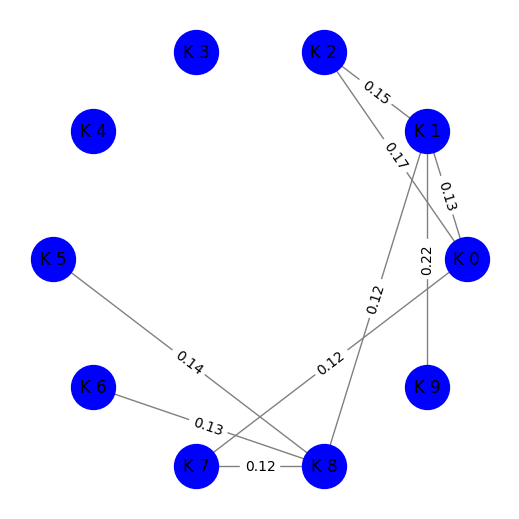

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Tambahkan node (kalimat)
for i in range(len(cosine_sim)):
    G.add_node(i)

# Tambahkan edge (hubungan) antara kalimat berdasarkan cosine similarity
for i in range(len(cosine_sim)):
    for j in range(len(cosine_sim)):
        similarity = cosine_sim[i][j]
        if similarity > 0.1 and i != j :  # Ambang batas untuk menentukan hubungan
            G.add_edge(i, j, weight=similarity)

# Visualisasikan grafik dengan tata letak "circular" dan penyesuaian visual
pos = nx.circular_layout(G)

# Membuat label node yang hanya menggunakan nomor indeks
labels = {i: f'K {i}' for i in G.nodes()}

edge_labels = {(i, j): round(data['weight'], 2) for i, j, data in G.edges(data=True)}

# Atur ukuran node
node_size = 1000

# Atur warna node dan edge
node_color = 'blue'
edge_color = 'gray'

plt.figure(figsize=(5, 5))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=node_size, node_color=node_color, edge_color=edge_color)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


##8.2. Graph dengan preprocessing

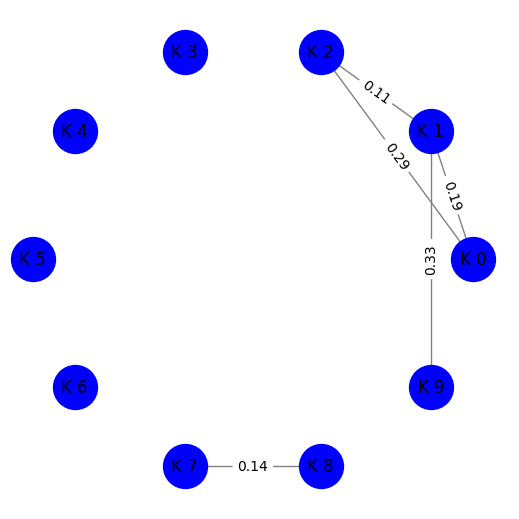

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G_preprocessing = nx.Graph()

# Tambahkan node (kalimat)
for i in range(len(cosine_sim_preprocessing)):
    G_preprocessing.add_node(i)

# Tambahkan edge (hubungan) antara kalimat berdasarkan cosine similarity
for i in range(len(cosine_sim_preprocessing)):
    for j in range(len(cosine_sim_preprocessing)):
        similarity = cosine_sim_preprocessing[i][j]
        if similarity > 0.1 and i != j :  # Ambang batas untuk menentukan hubungan
            G_preprocessing.add_edge(i, j, weight=similarity)

# Visualisasikan grafik dengan tata letak "circular" dan penyesuaian visual
pos = nx.circular_layout(G_preprocessing)

# Membuat label node yang hanya menggunakan nomor indeks
labels = {i: f'K {i}' for i in G_preprocessing.nodes()}

edge_labels = {(i, j): round(data['weight'], 2) for i, j, data in G_preprocessing.edges(data=True)}

# Atur ukuran node
node_size = 1000

# Atur warna node dan edge
node_color = 'blue'
edge_color = 'gray'

plt.figure(figsize=(5, 5))
nx.draw(G_preprocessing, pos, with_labels=True, labels=labels, node_size=node_size, node_color=node_color, edge_color=edge_color)
nx.draw_networkx_edge_labels(G_preprocessing, pos, edge_labels=edge_labels)
plt.show()


#9. Closeness Centrality

Closeness Centrality adalah suatu metriks yang mengukur seberapa dekat suatu node dengan semua node lainnya dalam suatu graph. Node dengan closeness centrality yang tinggi dianggap sebagai node yang memiliki akses yang lebih cepat atau lebih efisien ke seluruh bagian jaringan graph. Rumus Closeness Centrality untuk suatu node v dalam sebuah graph terarah atau tidak terarah :
$$ \text{C}(v) = \sum_{u} \frac{1}{d(v, u)} $$
Keterangan :
* C(v) = closeness centrality dari node v.
* d(v,u) = panjang jalur terpendek (jumlah edge) dari node v ke node u.
* $$ \sum_{u} d(v,u) $$ = jumlah panjang jalur terpendek dari node vv ke semua node lain dalam jaringan.

Closeness centrality berkisar antara 0 hingga 1, di mana nilai yang lebih tinggi menunjukkan bahwa node tersebut lebih dekat dengan seluruh jaringan.


##9.1. Closeness centrality tanpa preprocessing

In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Membuat DataFrame dari nilai Closeness Centrality
centrality_df = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])

# Mengurutkan DataFrame berdasarkan Closeness Centrality dari yang terbesar
centrality_df_sorted = centrality_df.sort_values(by='Closeness Centrality', ascending=False)

# Menampilkan tabel Closeness Centrality yang telah diurutkan
centrality_df_sorted

,Node,Closeness Centrality
1,1,0.544444
8,8,0.544444
0,0,0.418803
7,7,0.418803
2,2,0.388889
5,5,0.340278
6,6,0.340278
9,9,0.340278
3,3,0.000000
4,4,0.000000


In [ ]:
# Mengambil tiga baris teratas dari DataFrame yang sudah diurutkan
top_three_closeness = centrality_df_sorted.head(3)

# Mendapatkan indeks node dari tiga baris teratas
top_node_indices = top_three_closeness['Node']

# Menampilkan kalimat yang sesuai dengan node-node teratas
for node_index in top_node_indices:
    print(f"Node {node_index}: {kalimat[node_index]}")


Node 1: "Jadi kita mendapatkan nomor 3 itu pas, sesuai dengan sila ketiga 'Persatuan Indonesia', kita satukan semuanya dalam proses politik yang menggembirakan," kata Ganjar dalam acara pengundian nomor urut di Kantor KPU, Jakarta, Selasa (14/11/2023).
Node 8: "Muara itulah muara demokrasi yang hari ini kita idam-idamkan dan tentu saja inilah kesepakatam hari ini yang mesti kita jaga," ucap dia.
Node 0:  Menurut dia, semangat persatuan Indonesia itu penting agar masyarakat Indonesia tidak terpecah belah akibat proses Pemilihan Umum (Pemilu 2024).


##9.2. Closeness centrality dengan preprocessing

In [ ]:
# Menghitung closeness centrality
closeness_centrality_preprocessing = nx.closeness_centrality(G_preprocessing)

# Membuat DataFrame dari nilai Closeness Centrality
centrality_df_preprocessing = pd.DataFrame(closeness_centrality_preprocessing.items(), columns=['Node', 'Closeness Centrality Preprocessing'])

# Mengurutkan DataFrame berdasarkan Closeness Centrality dari yang terbesar
centrality_df_sorted_preprocessing = centrality_df_preprocessing.sort_values(by='Closeness Centrality Preprocessing', ascending=False)

# Menampilkan tabel Closeness Centrality yang telah diurutkan
centrality_df_sorted_preprocessing

,Node,Closeness Centrality Preprocessing
1,1,0.333333
0,0,0.250000
2,2,0.250000
9,9,0.200000
7,7,0.111111
8,8,0.111111
3,3,0.000000
4,4,0.000000
5,5,0.000000
6,6,0.000000


In [ ]:
# Mengambil tiga baris teratas dari DataFrame yang sudah diurutkan
top_three_closeness_preprocessing = centrality_df_sorted_preprocessing.head(3)

# Mendapatkan indeks node dari tiga baris teratas
top_node_indices_preprocessing = top_three_closeness_preprocessing['Node']

# Menampilkan kalimat yang sesuai dengan node-node teratas
for node_index in top_node_indices_preprocessing:
    print(f"Node Node Preprocessing {node_index}: {kalimat[node_index]}")


Node Node Preprocessing 1: "Jadi kita mendapatkan nomor 3 itu pas, sesuai dengan sila ketiga 'Persatuan Indonesia', kita satukan semuanya dalam proses politik yang menggembirakan," kata Ganjar dalam acara pengundian nomor urut di Kantor KPU, Jakarta, Selasa (14/11/2023).
Node Node Preprocessing 0:  Menurut dia, semangat persatuan Indonesia itu penting agar masyarakat Indonesia tidak terpecah belah akibat proses Pemilihan Umum (Pemilu 2024).
Node Node Preprocessing 2: Ganjar menuturkan, masyarakat seharusnya mendapat kebahagiaan dalam proses pelaksanaan pemilu.


#10. Page Rank

PageRank adalah suatu metriks dalam yang digunakan untuk menilai pentingnya suatu node dalam suatu graph. Jika N adalah jumlah halaman dalam graf, d adalah faktor damping (0,85), dan M adalah matriks transfer yang mencerminkan tautan antar-halaman, maka rumus PageRank dalam bentuk matriks dapat dituliskan sebagai berikut: :
$$ \text{PR} = (1 - d) \cdot v + d \cdot \text{MPR} $$

Keterangan :
* PR = vektor kolom PageRank.
* v = vektor kolom yang berisi skor yang setara untuk setiap halaman.
* M =  matriks transfer yang mencerminkan tautan antar-halaman.


##10.1. Page rank tanpa preprocessing

In [ ]:
# Menghitung closeness centrality
pagerank = nx.pagerank(G)

# Membuat DataFrame dari nilai Closeness Centrality
pagerank_df = pd.DataFrame(pagerank.items(), columns=['Node', 'Page Rank'])

# Mengurutkan DataFrame berdasarkan Closeness Centrality dari yang terbesar
pagerank_df_sorted = pagerank_df.sort_values(by='Page Rank', ascending=False)

# Menampilkan tabel Closeness Centrality yang telah diurutkan
pagerank_df_sorted

,Node,Page Rank
1,1,0.210624
8,8,0.198672
0,0,0.145374
2,2,0.111768
7,7,0.093352
9,9,0.081011
5,5,0.063244
6,6,0.059810
3,3,0.018072
4,4,0.018072


In [ ]:
# Mengambil tiga baris teratas dari DataFrame yang sudah diurutkan
top_three_pagerank = pagerank_df_sorted.head(3)

# Mendapatkan indeks node dari tiga baris teratas
top_node_indices = top_three_pagerank['Node']

# Menampilkan kalimat yang sesuai dengan node-node teratas
for node_index in top_node_indices:
    print(f"Node {node_index}: {kalimat[node_index]}")


Node 1: "Jadi kita mendapatkan nomor 3 itu pas, sesuai dengan sila ketiga 'Persatuan Indonesia', kita satukan semuanya dalam proses politik yang menggembirakan," kata Ganjar dalam acara pengundian nomor urut di Kantor KPU, Jakarta, Selasa (14/11/2023).
Node 8: "Muara itulah muara demokrasi yang hari ini kita idam-idamkan dan tentu saja inilah kesepakatam hari ini yang mesti kita jaga," ucap dia.
Node 0:  Menurut dia, semangat persatuan Indonesia itu penting agar masyarakat Indonesia tidak terpecah belah akibat proses Pemilihan Umum (Pemilu 2024).


##10.2. Page rank dengan preprocessing

In [ ]:
# Menghitung closeness centrality
pagerank_preprocessing = nx.pagerank(G_preprocessing)

# Membuat DataFrame dari nilai Closeness Centrality
pagerank_df_preprocessing = pd.DataFrame(pagerank_preprocessing.items(), columns=['Node', 'Page Rank Preprocessing'])

# Mengurutkan DataFrame berdasarkan Closeness Centrality dari yang terbesar
pagerank_df_sorted_preprocessing = pagerank_df_preprocessing.sort_values(by='Page Rank Preprocessing', ascending=False)

# Menampilkan tabel Closeness Centrality yang telah diurutkan
pagerank_df_sorted_preprocessing

,Node,Page Rank Preprocessing
1,1,0.202300
0,0,0.157838
7,7,0.151515
8,8,0.151515
2,2,0.133219
9,9,0.112704
3,3,0.022727
4,4,0.022727
5,5,0.022727
6,6,0.022727


In [ ]:
# Mengambil tiga baris teratas dari DataFrame yang sudah diurutkan
top_three_pagerank_preprocessing = pagerank_df_sorted_preprocessing.head(3)

# Mendapatkan indeks node dari tiga baris teratas
top_node_indices = top_three_pagerank_preprocessing['Node']

# Menampilkan kalimat yang sesuai dengan node-node teratas
for node_index in top_node_indices:
    print(f"Node {node_index}: {kalimat[node_index]}")

Node 1: "Jadi kita mendapatkan nomor 3 itu pas, sesuai dengan sila ketiga 'Persatuan Indonesia', kita satukan semuanya dalam proses politik yang menggembirakan," kata Ganjar dalam acara pengundian nomor urut di Kantor KPU, Jakarta, Selasa (14/11/2023).
Node 0:  Menurut dia, semangat persatuan Indonesia itu penting agar masyarakat Indonesia tidak terpecah belah akibat proses Pemilihan Umum (Pemilu 2024).
Node 7: "Tapi percayalah, air yang mengalir itu dia akan mengikuti arah batinnya, dia tidak akan bisa dibendung dengan cara apa pun, dan kalau bendungan itu dia paksakan, dia akan tetep mencari jalannya sampai tiba di muara," kata Ganjar.


#11. Eigen Vector

Eigen vector pada dasarnya adalah vektor yang tidak mengalami perubahan arah ketika dioperasikan oleh suatu transformasi linear. Eigen vector sering kali dihubungkan dengan matriks, dan konsep ini memiliki banyak aplikasi dalam berbagai bidang. Eigen vector (v) dari suatu matriks (A) dan nilai eigen (λ) didefinisikan oleh persamaan berikut:
$$ A v = \lambda v $$
Keterangan :
* A adalah matriks.
* v adalah eigen vector.
* λ adalah nilai eigen (skalar).

Persamaan ini dapat diubah menjadi bentuk ekivalen:
$$ (A - \lambda I) v = 0 $$

Untuk matriks AA berukuran nxn, persamaan karakteristik mengambil bentuk:
$$ \det(A - \lambda I) = 0 $$

Eigen vector yang sesuai dengan setiap nilai eigen dapat ditemukan dengan menggantikan nilai eigen λλ ke dalam persamaan:
$$ (A - \lambda I) v = 0 $$


##11.1. Eigen Vector tanpa preprocessing

In [ ]:
# Menghitung closeness centrality
eigenvector = nx.eigenvector_centrality(G)

# Membuat DataFrame dari nilai Closeness Centrality
eigenvector_df = pd.DataFrame(eigenvector.items(), columns=['Node', 'Eigen Vector'])

# Mengurutkan DataFrame berdasarkan Closeness Centrality dari yang terbesar
eigenvector_df_sorted = eigenvector_df.sort_values(by='Eigen Vector', ascending=False)

# Menampilkan tabel Closeness Centrality yang telah diurutkan
eigenvector_df_sorted

,Node,Eigen Vector
1,1,5.315532e-01
0,0,4.495588e-01
8,8,4.342525e-01
2,2,3.617653e-01
7,7,3.258892e-01
9,9,1.959997e-01
5,5,1.601236e-01
6,6,1.601236e-01
3,3,3.025712e-14
4,4,3.025712e-14


In [ ]:
# Mengambil tiga baris teratas dari DataFrame yang sudah diurutkan
top_three_eigenvector = eigenvector_df_sorted.head(3)

# Mendapatkan indeks node dari tiga baris teratas
top_node_indices = top_three_eigenvector['Node']

# Menampilkan kalimat yang sesuai dengan node-node teratas
for node_index in top_node_indices:
    print(f"Node {node_index}: {kalimat[node_index]}")


Node 1: "Jadi kita mendapatkan nomor 3 itu pas, sesuai dengan sila ketiga 'Persatuan Indonesia', kita satukan semuanya dalam proses politik yang menggembirakan," kata Ganjar dalam acara pengundian nomor urut di Kantor KPU, Jakarta, Selasa (14/11/2023).
Node 0:  Menurut dia, semangat persatuan Indonesia itu penting agar masyarakat Indonesia tidak terpecah belah akibat proses Pemilihan Umum (Pemilu 2024).
Node 8: "Muara itulah muara demokrasi yang hari ini kita idam-idamkan dan tentu saja inilah kesepakatam hari ini yang mesti kita jaga," ucap dia.


##11.1. Eigen Vector dengan preprocessing

In [ ]:
# Menghitung closeness centrality
eigenvector_preprocessing = nx.eigenvector_centrality(G_preprocessing)

# Membuat DataFrame dari nilai Closeness Centrality
eigenvector_df_preprocessing = pd.DataFrame(eigenvector_preprocessing.items(), columns=['Node', 'Eigen Vector Preprocessing'])

# Mengurutkan DataFrame berdasarkan Closeness Centrality dari yang terbesar
eigenvector_df_sorted_preprocessing = eigenvector_df_preprocessing.sort_values(by='Eigen Vector Preprocessing', ascending=False)

# Menampilkan tabel Closeness Centrality yang telah diurutkan
eigenvector_df_sorted_preprocessing

,Node,Eigen Vector Preprocessing
1,1,6.116285e-01
0,0,5.227207e-01
2,2,5.227207e-01
9,9,2.818452e-01
7,7,8.155572e-06
8,8,8.155572e-06
3,3,4.861100e-13
4,4,4.861100e-13
5,5,4.861100e-13
6,6,4.861100e-13


In [ ]:
# Mengambil tiga baris teratas dari DataFrame yang sudah diurutkan
top_three_eigenvector_preprocessing = eigenvector_df_sorted_preprocessing.head(3)

# Mendapatkan indeks node dari tiga baris teratas
top_node_indices = top_three_eigenvector_preprocessing['Node']

# Menampilkan kalimat yang sesuai dengan node-node teratas
for node_index in top_node_indices:
    print(f"Node {node_index}: {kalimat[node_index]}")


Node 1: "Jadi kita mendapatkan nomor 3 itu pas, sesuai dengan sila ketiga 'Persatuan Indonesia', kita satukan semuanya dalam proses politik yang menggembirakan," kata Ganjar dalam acara pengundian nomor urut di Kantor KPU, Jakarta, Selasa (14/11/2023).
Node 0:  Menurut dia, semangat persatuan Indonesia itu penting agar masyarakat Indonesia tidak terpecah belah akibat proses Pemilihan Umum (Pemilu 2024).
Node 2: Ganjar menuturkan, masyarakat seharusnya mendapat kebahagiaan dalam proses pelaksanaan pemilu.
